In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [108]:
df = pd.read_csv('student_depression_dataset.csv', sep=',')

In [109]:
df['Sleep Duration'] = df['Sleep Duration'].str.replace("'", "").str.strip()

In [110]:
sleep_map = {
    "Less than 5 hours" : 4.0,
    "5-6 hours" : 5.5,
    "7-8 hours" : 7.5,
    "More than 8 hours" : 9.0,
    "Others" : 6.0
}

df['Sleep Duration'] = df['Sleep Duration'].replace(sleep_map)
df['Sleep Duration'].unique()

C:\Users\Ádám\AppData\Local\Temp\ipykernel_18160\3047247968.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sleep Duration'] = df['Sleep Duration'].replace(sleep_map)


array([5.5, 4. , 7.5, 9. , 6. ])

In [111]:
switch_to_binary = {
    'Yes' : 1,
    'No' : 0
}

df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].replace(switch_to_binary)
df['Have you ever had suicidal thoughts ?']

C:\Users\Ádám\AppData\Local\Temp\ipykernel_18160\2304771104.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].replace(switch_to_binary)


0        1
1        0
2        0
3        1
4        1
        ..
27896    1
27897    0
27898    0
27899    1
27900    1
Name: Have you ever had suicidal thoughts ?, Length: 27901, dtype: int64

In [112]:
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].replace(switch_to_binary)
df['Family History of Mental Illness'] 

C:\Users\Ádám\AppData\Local\Temp\ipykernel_18160\2609556202.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Family History of Mental Illness'] = df['Family History of Mental Illness'].replace(switch_to_binary)


0        0
1        1
2        1
3        1
4        0
        ..
27896    1
27897    1
27898    0
27899    0
27900    1
Name: Family History of Mental Illness, Length: 27901, dtype: int64

In [113]:
switch_to_binary = {
    'Male' : 1,
    'Female' : 0
}

df['Gender'] = df['Gender'].replace(switch_to_binary)
df['Gender'] 

C:\Users\Ádám\AppData\Local\Temp\ipykernel_18160\2404265391.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(switch_to_binary)


0        1
1        0
2        1
3        0
4        0
        ..
27896    0
27897    1
27898    1
27899    0
27900    1
Name: Gender, Length: 27901, dtype: int64

In [114]:
from sklearn.ensemble import IsolationForest

In [115]:
features_for_outliers = ['CGPA', 'Work/Study Hours', 'Sleep Duration', 'Age']

iso = IsolationForest(contamination=0.05, random_state=42)
yhat = iso.fit_predict(df[features_for_outliers])

mask = yhat != -1
df_cleaned = df[mask].copy() 

df = df_cleaned


In [116]:
df['Pressure_Index'] = df['Work/Study Hours'] / df['Sleep Duration']

In [117]:
print(df['Pressure_Index'].describe())

count    26506.000000
mean         1.286601
std          0.768076
min          0.000000
25%          0.727273
50%          1.222222
75%          1.818182
max          3.000000
Name: Pressure_Index, dtype: float64


In [118]:
from sklearn.preprocessing import LabelEncoder

In [119]:
le_city = LabelEncoder()
le_prof = LabelEncoder()
le_diet = LabelEncoder()
le_degree = LabelEncoder()

In [120]:
df['City_Code'] = le_city.fit_transform(df['City'])
df['Profession_Code'] = le_prof.fit_transform(df['Profession'])
df['Dietary_Code'] = le_diet.fit_transform(df['Dietary Habits'])
df['Degree_Code'] = le_degree.fit_transform(df['Degree'])

In [121]:
df = df.drop(columns=['City', 'Profession', 'Dietary Habits', 'Degree', 'id'])

In [122]:
df['Financial Stress'] = df['Financial Stress'].replace('?', np.nan)
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')
median_val = df['Financial Stress'].median()
df['Financial Stress'] = df['Financial Stress'].fillna(median_val)

In [123]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [124]:
le_gender = LabelEncoder()
df['Gender_Code'] = le_gender.fit_transform(df['Gender'])

df = df.drop(columns=['Gender'])

In [125]:
x = df.drop(columns=['Depression'])
y = df['Depression']

In [126]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 26506 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    26506 non-null  float64
 1   Academic Pressure                      26506 non-null  float64
 2   Work Pressure                          26506 non-null  float64
 3   CGPA                                   26506 non-null  float64
 4   Study Satisfaction                     26506 non-null  float64
 5   Job Satisfaction                       26506 non-null  float64
 6   Sleep Duration                         26506 non-null  float64
 7   Have you ever had suicidal thoughts ?  26506 non-null  int64  
 8   Work/Study Hours                       26506 non-null  float64
 9   Financial Stress                       26506 non-null  float64
 10  Family History of Mental Illness       26506 non-null  int64  
 11  Depress

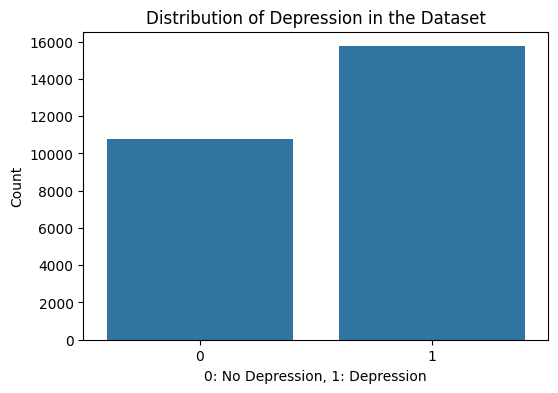

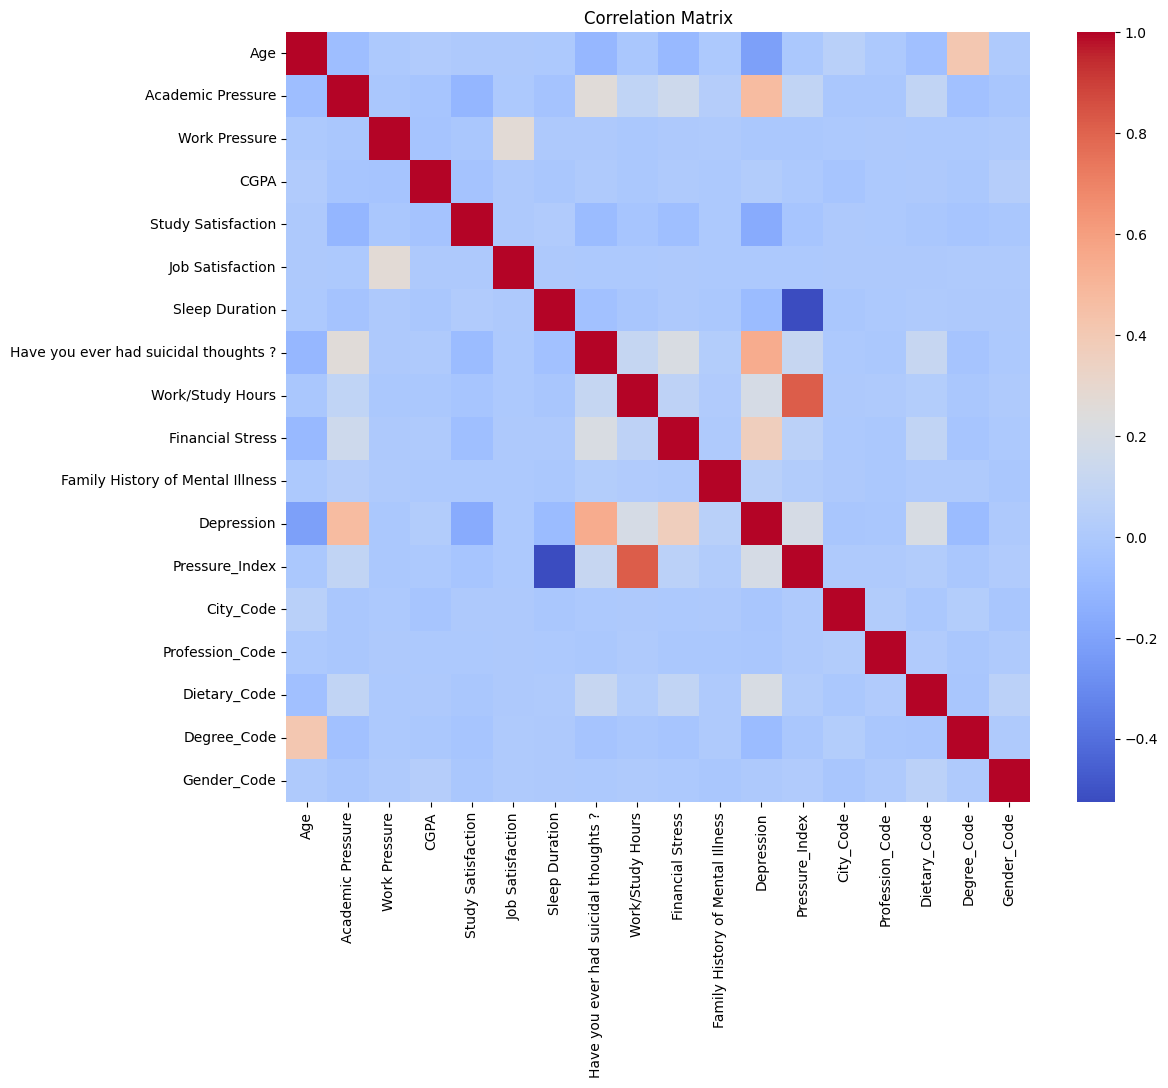

In [127]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Depression', data=df)
plt.title('Distribution of Depression in the Dataset')
plt.xlabel('0: No Depression, 1: Depression')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 10))

numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [128]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled_df, y, test_size=0.2, random_state=42)

In [130]:
import tensorflow as tf
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
from keras.optimizers import Adam

In [131]:
def build_model(hp):
    model = Sequential()    
    num_layers = 7
    l2_rate = hp.Choice('l2_rate', values=[0.001, 0.005, 0.01])    
    dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)

    for i in range(num_layers):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=16, max_value=64, step=16),
            activation='relu',
            kernel_regularizer=l2(l2_rate) 
        ))
        
        model.add(BatchNormalization())        
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-3, 3e-4, 1e-4])
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [132]:
tuner = kt.Hyperband(
    build_model, 
    objective='val_accuracy',
    max_epochs=25,
    factor=3,
    directory='D:/temp/tuner_logs',      
    project_name='tuning' 
)

Reloading Tuner from D:/temp/tuner_logs\tuning\tuner0.json


In [133]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [134]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

In [135]:
tuner.search(
    X_train, y_train,
    epochs=15,
    validation_data = (X_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

In [136]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

In [137]:
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,     
    batch_size=64,  
    callbacks=[early_stopping, reduce_lr], 
    verbose=1
)

Epoch 1/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6151 - loss: 1.7442 - val_accuracy: 0.8193 - val_loss: 1.3696 - learning_rate: 0.0010
Epoch 2/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7733 - loss: 1.2379 - val_accuracy: 0.8329 - val_loss: 0.9965 - learning_rate: 0.0010
Epoch 3/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8167 - loss: 0.9193 - val_accuracy: 0.8370 - val_loss: 0.7758 - learning_rate: 0.0010
Epoch 4/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8230 - loss: 0.7212 - val_accuracy: 0.8336 - val_loss: 0.6218 - learning_rate: 0.0010
Epoch 5/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8293 - loss: 0.5897 - val_accuracy: 0.8310 - val_loss: 0.5313 - learning_rate: 0.0010
Epoch 6/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8285 - loss: 0.5136 - val_accuracy: 0.8278 - val_loss: 0.4728 - learning_rate: 0.0010
Epoch 7/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8325 - loss: 0.

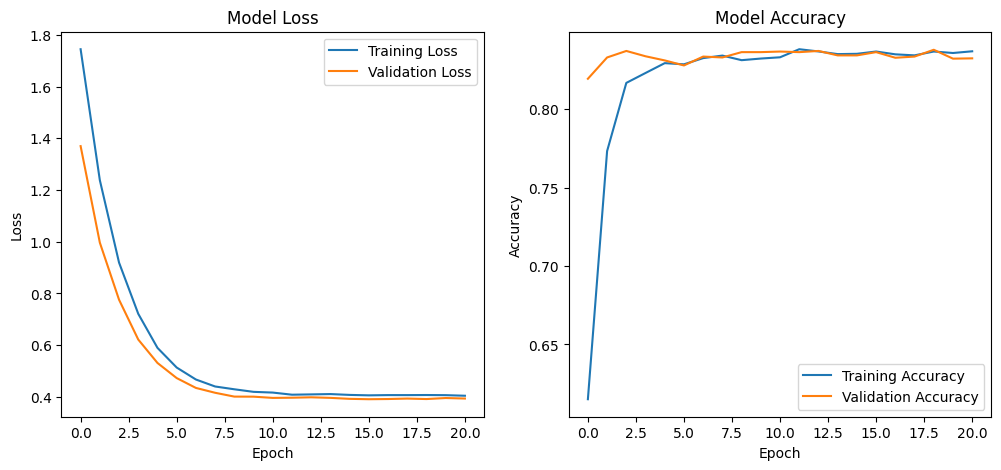

In [138]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

--- Detailed Classification Report ---
              precision    recall  f1-score   support

           0       0.84      0.74      0.78      2139
           1       0.84      0.90      0.87      3163

    accuracy                           0.84      5302
   macro avg       0.84      0.82      0.83      5302
weighted avg       0.84      0.84      0.83      5302



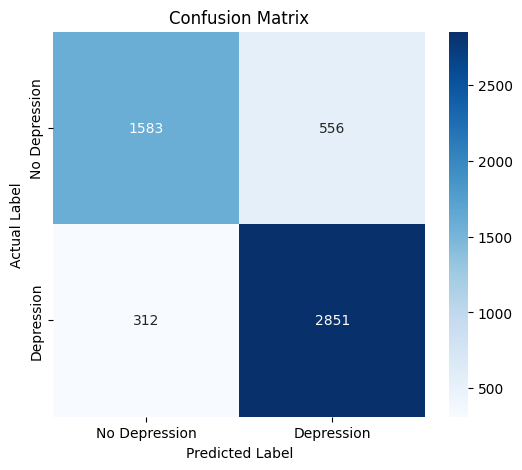

In [139]:
y_pred_probs = best_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

print("\n--- Detailed Classification Report ---")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Depression', 'Depression'], 
            yticklabels=['No Depression', 'Depression'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.show()

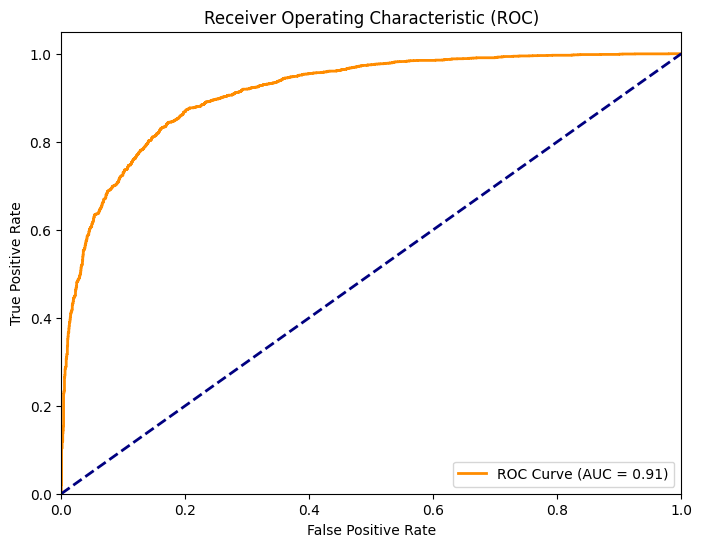

In [140]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

plt.show()